1. Superposicion Finita de eigenestados

In [21]:
#Importing the necessary modules for the code
include("QuantumOsc.jl") #Use the module in the same folder, it already compiles it. The Moduel QuantumOsc should be in the same folder, else specify directory

using .QuantumOsc
using Plots
using LaTeXStrings
using QuadGK

ħ = 1
m = 1
ω = 1
s = sqrt(2*ħ / (m*ω))

QuantumOsc.set_constants(ħ, m, ω) #This is a command for settin constants ħ, m, ω respectively in the functions used in QuantumOsc Module

1.4142135623730951

In [22]:
#Variables for simulation (Would be nice to just compile them once)
#Spacial Variable x
stpx = 0.005
lim = 7
x = Float64.(-lim:stpx:lim)

#Temporal Variable t
stpt = 0.01
periods = 2
tf = periods*(2π/ω)
t = Float64.(0:stpt:tf)

1257-element Vector{Float64}:
  0.0
  0.01
  0.02
  0.03
  0.04
  0.05
  0.06
  0.07
  0.08
  0.09
  0.1
  0.11
  0.12
  ⋮
 12.450000000000001
 12.46
 12.47
 12.48
 12.49
 12.5
 12.51
 12.52
 12.530000000000001
 12.540000000000001
 12.55
 12.56

In [23]:
#State 1
A_1 = 0.3799 #Normalization value, analytically calculated
ψ_1(x) = A_1*(φ_n(x,0) + 0.7φ_n(x,1) - 1.2φ_n(x,2) + 2φ_n(x,3)) #The φ functions come from the QuantumOsc module, check the module for more functions employed

ψ_1 (generic function with 1 method)

In [24]:
#Plotting Solution in t = 0 (Just x)
fun(x) = abs(ψ_1(x))^2 #Dummy fun, for |ψ_1|^2 to be callable as a function
integ = round(integral(fun, -lim, lim); digits=2)
println(integ) #Checking if the integral is indeed one
plot(x, abs.(ψ_1(x)).^2, title=L"$\vert\psi_1\vert^2$ at time $t=0$", label = L"$|\psi_1|^2$")
savefig("ex1mp\\state1t0.png")

1.0


"c:\\Users\\emino\\OneDrive\\Escritorio\\Tareas\\5to Semestre\\Cuantica\\Cuantica MP1 QuantumOsc NEW OPTIMIZED\\ex1mp\\state1t0.png"

In [25]:
#Function with Temporal Evolution
ψt_1(x,t) = A_1*(φt_n(x,t,0) + 0.7φt_n(x,t,1) - 1.2φt_n(x,t,2) + 2φt_n(x,t,3))

ψt_1 (generic function with 1 method)

In [26]:
#Generation of heatmap and expected value
heatmap_matrix, exp_x_val = heatmap_gen(ψt_1, x, t)

([3.128930747855678e-17 3.341603612881597e-17 … 2.192058459223357e-17 2.053169518125199e-17; 3.128897530687e-17 3.341568114689093e-17 … 2.1920748254172452e-17 2.0531848440123842e-17; … ; 3.12884172820302e-17 3.34150848024649e-17 … 2.1921023215445603e-17 2.053210592362603e-17; 3.128917266685097e-17 3.34158920595872e-17 … 2.192065101322984e-17 2.053175738024163e-17], [-0.9480392932949394, -0.9479918917252902, -0.9478496917564585, -0.9476127076083233, -0.9472809629791018, -0.9468544910429807, -0.9463333344467982, -0.9457175453057792, -0.945007185198325, -0.9442023251598548  …  -0.9436403389667051, -0.9445053598933223, -0.9452759310710354, -0.9459519754433686, -0.9465334254064482, -0.947020222815762, -0.947412318991976, -0.9477096747257978, -0.9479122602819023, -0.9480200554019032])

In [27]:
size(heatmap_matrix)

(1257, 2801)

In [28]:
#Heatmap of the function through time (without expected value)
heatmap(x, t, heatmap_matrix, xlabel="x", ylabel="t", title=L"Heatmap of $|\psi_1|^2$")
savefig("ex1mp\\heatmap.png")

"c:\\Users\\emino\\OneDrive\\Escritorio\\Tareas\\5to Semestre\\Cuantica\\Cuantica MP1 QuantumOsc NEW OPTIMIZED\\ex1mp\\heatmap.png"

In [29]:
#Heatmap of the function through time with the expected value <x>
heatmap(x, t, heatmap_matrix, xlabel="x", ylabel="t", title=L"Heatmap of $|\psi_1|^2$")
plot!(exp_x_val, t, label=L"$\langle x \rangle$")
savefig("ex1mp\\heatmap_exp_val.png")

"c:\\Users\\emino\\OneDrive\\Escritorio\\Tareas\\5to Semestre\\Cuantica\\Cuantica MP1 QuantumOsc NEW OPTIMIZED\\ex1mp\\heatmap_exp_val.png"

In [30]:
#Make Animation
anim = @animate for i ∈ 1:length(t)
    plot(x, heatmap_matrix[i, :], title = L"Evolution of $\vert\psi_1\vert^2$ over time $T=\frac{2\pi}{\omega}$", ylims=(-0.05 , 0.8), label=false)
end

# Save animation
gif(anim, "ex1mp\\state1_temporal_animation.mp4", fps = 30)

[ Info: Saved animation to c:\Users\emino\OneDrive\Escritorio\Tareas\5to Semestre\Cuantica\Cuantica MP1 QuantumOsc NEW OPTIMIZED\ex1mp\state1_temporal_animation.mp4


Plots.AnimatedGif("c:\\Users\\emino\\OneDrive\\Escritorio\\Tareas\\5to Semestre\\Cuantica\\Cuantica MP1 QuantumOsc NEW OPTIMIZED\\ex1mp\\state1_temporal_animation.mp4")

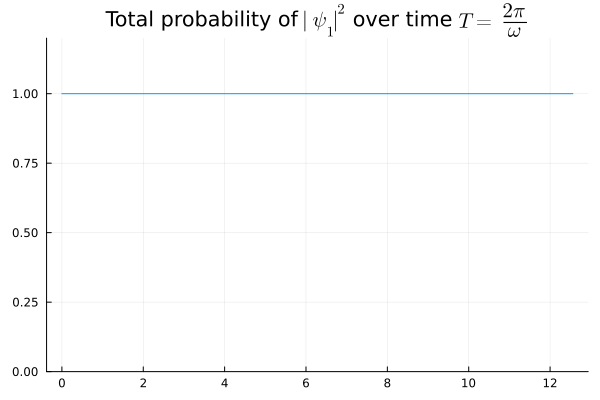

In [35]:
#Check probability conservation
p = zeros(Float64, length(t))
for i ∈ 1:length(t)
    p[i] = sum(heatmap_matrix[i,:])*stpx
end

In [37]:
#Plot probability conservation
plot(t, p, title = L"Total probability of $\vert\psi_1\vert^2$ over time $T=\frac{2\pi}{\omega}$", label=false, ylims=(0, 1.2))
savefig("ex1mp\\state1_cop.png")

"c:\\Users\\emino\\OneDrive\\Escritorio\\Tareas\\5to Semestre\\Cuantica\\Cuantica MP1 QuantumOsc NEW OPTIMIZED\\ex1mp\\state1_cop.png"